In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
sns.set()


In [2]:
data = pd.read_csv("C:/Users/tannu/Downloads/freq.csv")

In [3]:
data.head()

,Freq,Accelerometer,TENG
0,4,0.015,0.540
1,5,0.035,0.552
2,6,0.050,0.600
3,7,0.080,0.608
4,8,0.130,0.696


Text(0, 0.5, 'Frequency')

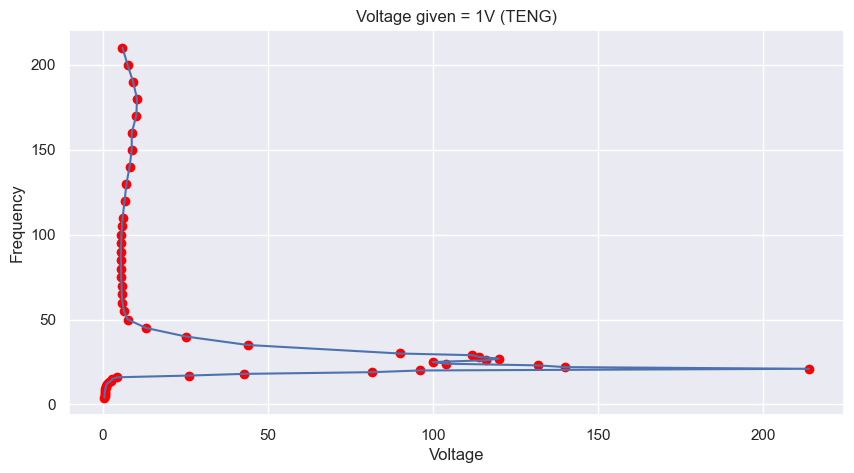

In [4]:
xdata = data['TENG']  # Setting the x values
ydata = data['Freq']

plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(xdata, ydata)
plt.scatter(xdata, ydata, color = "Red")
plt.title("Voltage given = 1V (TENG)")
plt.xlabel('Voltage')
plt.ylabel('Frequency')

In [5]:
breakpoints = [4.4 , 120, 7.6]
segments = []
for i in range(len(breakpoints) + 1):
    if i == 0:
        segment = data[data['TENG'] <= breakpoints[i]]
    elif i == len(breakpoints):
        segment = data[data['TENG'] > breakpoints[i - 1]]
    elif i == len(breakpoints)+1 :
        segment = data[data['TENG'] > breakpoints[i]]
    else:
        segment = data[(data['TENG'] > breakpoints[i - 1]) & (data['TENG'] <= breakpoints[i])]
    segments.append(segment)


In [6]:
segment

,Freq,Accelerometer,TENG
13,17,1.40,26.00
14,18,1.50,42.80
15,19,1.70,81.60
16,20,1.75,96.00
17,21,1.65,214.00
18,22,1.55,140.00
19,23,1.40,132.00
20,24,1.30,104.00
21,25,1.20,100.00
22,26,1.10,116.00


In [7]:
from sklearn.linear_model import LinearRegression

# Initialize a list to store the regression models
regression_models = []

# Fit linear regression models for each segment
for segment in segments:
    X = segment[['TENG']]
    y = segment['Freq']
    
    model = LinearRegression()
    model.fit(X, y)
    regression_models.append(model)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [ ]:
def piecewise_regression_predict(x):
    for i, model in enumerate(regression_models):
        if i == 0 and x <= breakpoints[i]:
            return model.predict([[x]])[0]
        elif i == len(breakpoints):
            return model.predict([[x]])[0]
        elif breakpoints[i - 1] < x <= breakpoints[i]:
            return model.predict([[x]])[0]

In [8]:
x_range = np.linspace(min(data['TENG']), max(data['TENG']), 100)
y_pred = [piecewise_regression_predict(x) for x in x_range]

plt.scatter(data['TENG'], data['Freq'], label='Data Points')
plt.plot(x_range, y_pred, color='red', label='Piecewise Regression Model')
plt.xlabel('TENG')
plt.ylabel('Freq')
plt.legend()
plt.show()

NameError: name 'piecewise_regression_predict' is not defined